# House Prices

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 数据加载与概览

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

训练数据集中共有样本1460个，其中数值类列有38个，非数值列有43个，共计81列。

In [6]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

通过文档，数值型特征可以分为以下几类：  
1. 等级：MSSubClass、OverallQual、OverallCond
2. 时间：YearBuilt、YearRemodAdd、GarageYrBlt、MoSold、YrSold
3. 连续数值：LotFrontage、LotArea、MasVnrArea、BsmtFinSF1、BsmtFinSF2、BsmtUnfSF、TotalBsmtSF、1stFlrSF、2ndFlrSF、LowQualFinSF、GrLivArea、GarageArea、WoodDeckSF、OpenPorchSF、EnclosedPorch、3SsnPorch、ScreenPorch、PoolArea、SalePrice
4. 数量值：BsmtFullBath、BsmtHalfBath、FullBath、HalfBath、BedroomAbvGr、KitchenAbvGr、TotRmsAbvGrd、Fireplaces、GarageCars

In [7]:
category_features = train.select_dtypes(include=[np.object])
category_features.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

## 数值型数据的分布

In [8]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

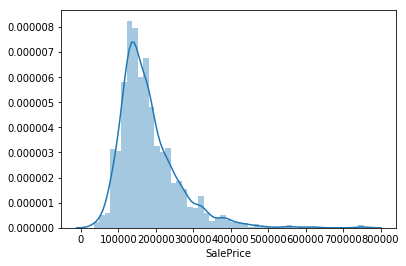

In [9]:
sns.distplot(train.SalePrice)  

从图上可以看出，数据时倾斜的

In [10]:
print ("Skew is:", train.SalePrice.skew())

Skew is: 1.8828757597682129


**通常希望数据的分布时符合正态分布的。如果偏态（skewness）值大于0.75，则需要进行分布变换，通常使用log变换**

Skew is: 0.12133506220520406


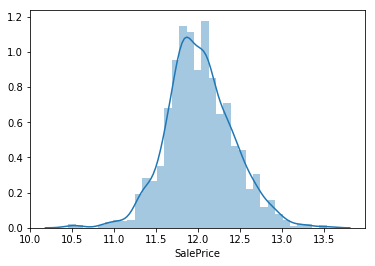

In [11]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
sns.distplot(target)

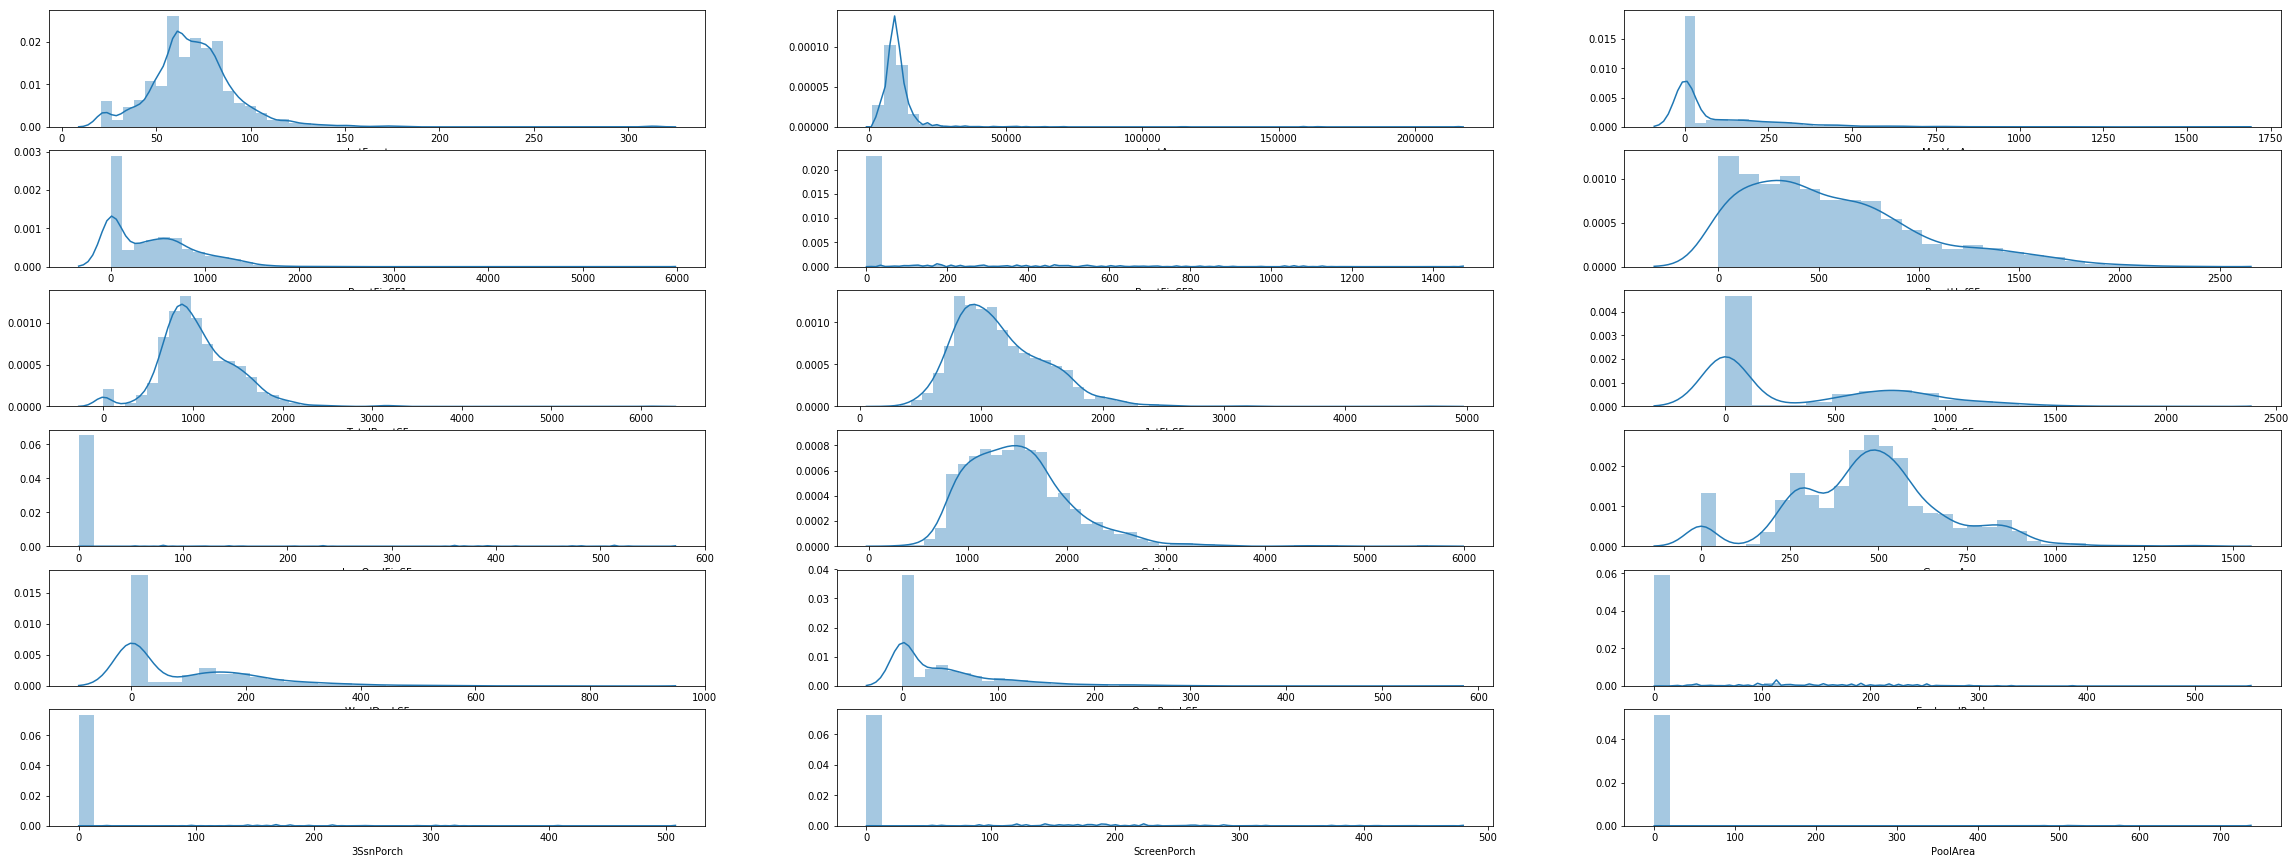

In [12]:
features = ['LotFrontage',"LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
            "LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea"]
plt.figure(figsize=(40,15))
for i,feature in enumerate(features,1):
    plt.subplot(6,3,i)
    sns.distplot(train[feature].dropna())

同理，可以将LotFrontage、LotArea、TotalBsmtSF、1stFlrSF、GrLivArea列也做一个log变换

## 特征相关性

In [13]:
corr = numeric_features.corr()

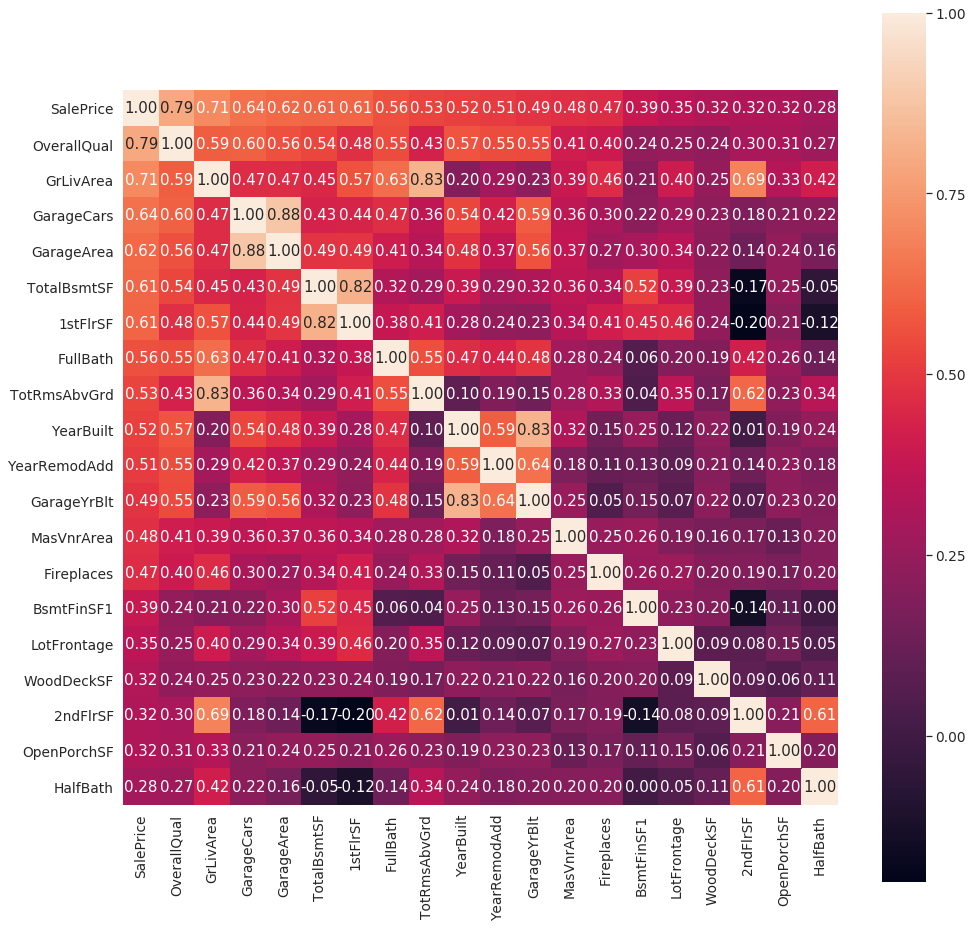

In [14]:
plt.figure(figsize=(16,16))
cols = corr.nlargest( 20 , 'SalePrice')['SalePrice'].index
cm = corr.loc[cols,cols]
sns.set(font_scale=1.25)
sns.heatmap(cm,annot=True, fmt=".2f",square=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

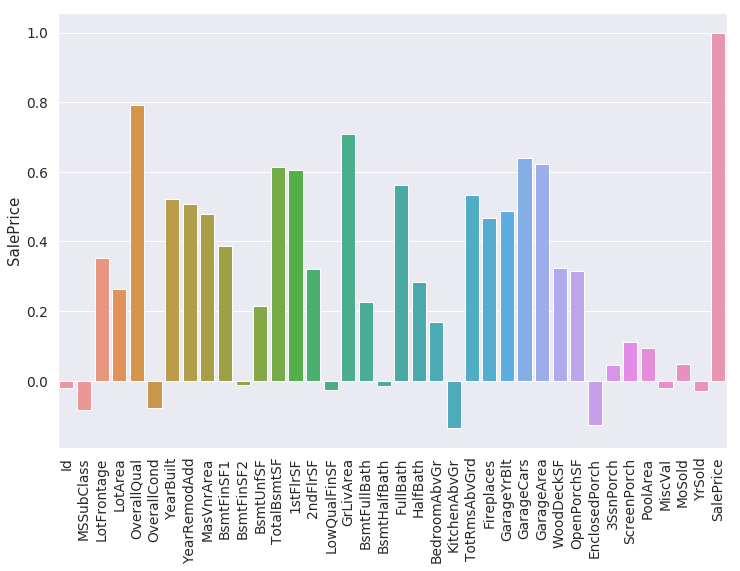

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x = corr.index,y=corr.SalePrice)
plt.xticks(rotation='vertical')

In [16]:
print (corr['SalePrice'].sort_values(ascending=False)[:6], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


数值特征中，与SalePrice相关性最大的5个特征分别是OverallQual、GrLivArea、GarageCars、GarageArea、TotalBsmtSF

### 相关性特征可视化

Text(0.5,0,'Size of garage in square feet')

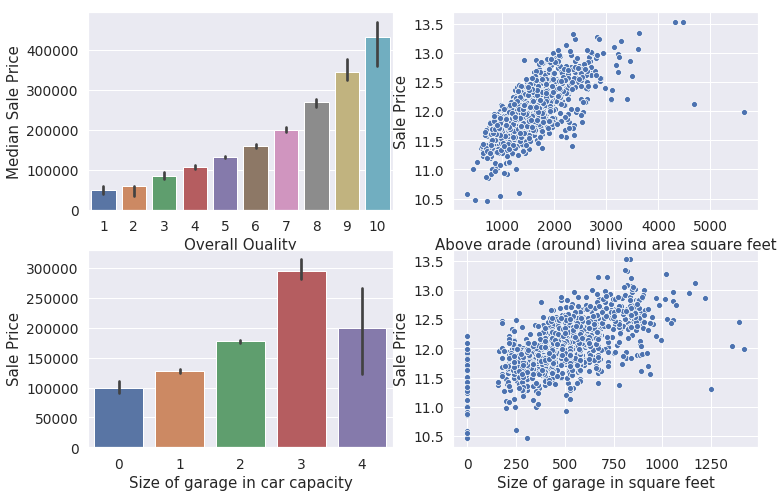

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
sns.barplot(x='OverallQual',y='SalePrice',data = train,estimator=np.median)
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.subplot(2,2,2)
sns.scatterplot(x=train["GrLivArea"].values, y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.subplot(2,2,3)
sns.barplot(x='GarageCars',y='SalePrice',data = train,estimator=np.median)
plt.ylabel('Sale Price')
plt.xlabel('Size of garage in car capacity')
plt.subplot(2,2,4)
sns.scatterplot(x=train["GarageArea"].values, y=target)
plt.ylabel('Sale Price')
plt.xlabel('Size of garage in square feet')

## 特征工程

1. 将训练集和测试集合并
2. 空值补全
3. 特征变换

### 数据集合并

In [55]:
train_Y =  train.SalePrice
data_X = pd.concat([train.drop(['SalePrice','Id'],axis=1),test])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

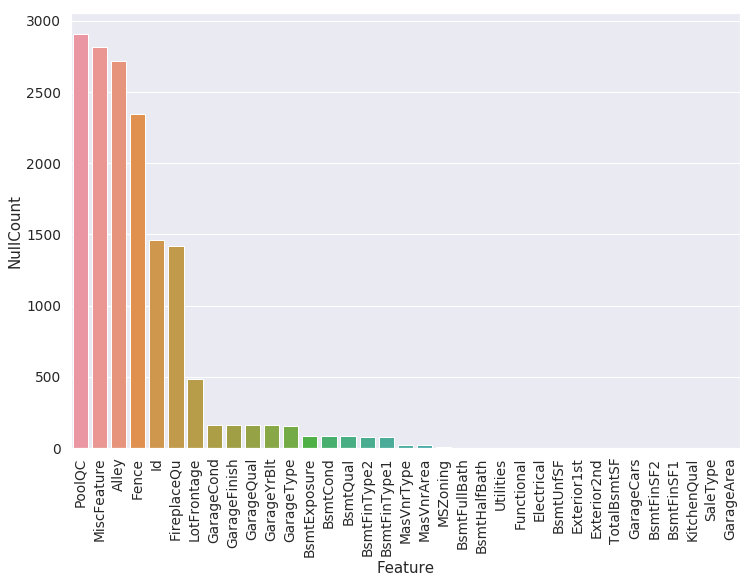

In [40]:
null_counts = data_X.isnull().sum()
nulls = pd.DataFrame(null_counts[null_counts > 0].sort_values(ascending=False))
nulls.columns = ['NullCount']
nulls.index.name = 'Feature'
plt.figure(figsize=(12,8))
sns.barplot(x = nulls.index,y = nulls['NullCount'])
plt.xticks(rotation='vertical')

In [41]:
nulls

,NullCount
Feature,
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
Id,1460
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageFinish,159


1. 其中缺失值较多的PoolQC、Alley、Fence、FireplaceQu通过查阅数据描述文档可知，缺失情况下代表没有，因为缺失量很大，可以对这几个特征做二值化处理，没有为0，有为1。
2. MiscFeature和MiscVal相对应，可以展开成多列。
3. LotFrontage与LotArea具有相关性，可以通过LoftArea估计LotFrontage的值，也可以直接去除这一列。
4. GarageXXXX系列特征缺失情况下代表没有车库，对于其中的类别特征可以不填充直接做onehot编码。
5. BsmtXXX系列与MasVnrXXX系列同GarageXXXX。
6. 对于其余缺失值较少的特征，数值类的直接用中位数填充，类别特征用中位数填充。

### 空置补全

1. MiscFeature和MiscVal处理

In [42]:
misc_feature_vals = data_X['MiscFeature'].value_counts()

In [43]:
misc_feature_vals.index
misc_feature_cols = ['MiscFeature' + val for val in  misc_feature_vals.index]
columns = data_X.columns.tolist()
columns.extend(misc_feature_cols)

In [44]:
for val in misc_feature_vals.index:
    data_X.loc[data_X['MiscFeature'] == 'Shed','MiscFeature' + val] = data_X.loc [data_X['MiscFeature'] == val,'MiscVal']

2. 缺失值较多的列作二值化处理

In [45]:
misc_feature_vals

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [46]:
#对PoolQC、Fence、FireplaceQu、MiscFeatureShed、MiscFeatureGar2、MiscFeatureOthr、MiscFeatureTenC
bool_features = ['PoolQC','Fence','FireplaceQu','MiscFeatureShed','MiscFeatureGar2','MiscFeatureOthr','MiscFeatureTenC']
for bool_feature in bool_features:
    isna = data_X[bool_feature].isna()
    data_X.loc[isna,bool_feature] = 0
    data_X.loc[~isna,bool_feature] = 1

3. 少量缺失的离散数据，用众数填充

In [47]:
mode_features = ['Utilities','MSZoning','Functional','Exterior2nd','KitchenQual','SaleType','Exterior1st','Electrical']
for mode_feature in mode_features:
    data_X.loc[data_X[mode_feature].isna(),mode_feature] = data_X[mode_feature].mode().values[0]

4. 车库相关列缺失值处理   
通过观察数据，GarageType,GarageYrBlt,GarageArea,GarageQual,GarageCond主要是由于没有车库造成的，但其中有两个GarageType值为Detchd。因为缺失值较少，离散值用众数法填充，连续值用中值填充。

In [48]:
data_X.loc[data_X['GarageType'].notna() != data_X['GarageQual'].notna() ,['GarageType','GarageYrBlt','GarageArea','GarageQual','GarageCond','GarageCars']]

,GarageType,GarageYrBlt,GarageArea,GarageQual,GarageCond,GarageCars
666,Detchd,NaN,360.0,NaN,NaN,1.0
1116,Detchd,NaN,NaN,NaN,NaN,NaN


In [49]:
# 中位数填充GarageArea
data_X.loc[data_X['GarageArea'].isna(),'GarageArea'] = data_X.loc[data_X['GarageType'] == 'Detchd','GarageArea'].median()
data_X.loc[data_X['GarageCars'].isna(),'GarageCars'] = data_X.loc[data_X['GarageType'] == 'Detchd','GarageCars'].median()

In [50]:
# 有车库但是其他几个属性缺失时采用众数填充
data_X.loc[data_X['GarageType'].notna() != data_X['GarageQual'].notna(),'GarageQual'] = data_X.loc[data_X['GarageType'] == 'Detchd','GarageQual'].mode()
data_X.loc[data_X['GarageType'].notna() != data_X['GarageCond'].notna(),'GarageCond'] = data_X.loc[data_X['GarageType'] == 'Detchd','GarageCond'].mode()
data_X.loc[data_X['GarageType'].notna() != data_X['GarageYrBlt'].notna(),'GarageYrBlt'] = data_X.loc[data_X['GarageType'] == 'Detchd','GarageYrBlt'].mode()

5. 地下室相关列缺失值处理
BsmtHalfBath、BsmtFullBath、BsmtFinSF1、BsmtFinSF2、BsmtUnfSF、TotalBsmtSF用0.0填充
BsmtCond、BsmtFinType1、BsmtFinType2为类别特征，缺失值可以直接作为一个值而不做处理

In [51]:
for bsmt_feature in ('BsmtHalfBath','BsmtFullBath','BsmtFinSF2','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF'):
     data_X.loc[data_X[bsmt_feature].isna(),bsmt_feature] = 0.0

6. MasVnrType与MasVnrArea
MasVnrType的空值作为一个类别值，MasVnrType缺失时将MasVnrArea置为0

In [52]:
data_X.loc[data_X['MasVnrType'].isna(),'MasVnrArea'] = 0.0

### 特征变换

1. frontage 预测

In [60]:
data_X[['LotFrontage','LotArea']]

,LotFrontage,LotArea
0,65.0,8450
1,80.0,9600
2,68.0,11250
3,60.0,9550
4,84.0,14260
5,85.0,14115
6,75.0,10084
7,NaN,10382
8,51.0,6120
9,50.0,7420


1. log变换

In [53]:
log_features = ['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','GrLivArea']
for log_feature in log_features:
    data_X[log_feature] = np.log(data_X[log_feature] + np.finfo(np.float64).eps)

2. onehot编码

4. 日期归一化

In [54]:
data_X[log_features]

,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,GrLivArea
0,4.174387,9.041922,6.752270,6.752270,7.444249
1,4.382027,9.169518,7.140453,7.140453,7.140453
2,4.219508,9.328123,6.824374,6.824374,7.487734
3,4.094345,9.164296,6.628041,6.867974,7.448334
4,4.430817,9.565214,7.043160,7.043160,7.695303
5,4.442651,9.554993,6.679599,6.679599,7.216709
6,4.317488,9.218705,7.430114,7.434848,7.434848
7,NaN,9.247829,7.009409,7.009409,7.644919
8,3.931826,8.719317,6.858565,6.929517,7.480992
9,3.912023,8.911934,6.898715,6.981935,6.981935
